<a href="https://colab.research.google.com/github/dangnha/tensorflow/blob/master/Neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Nerworks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number

In [2]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

## Creating data to view a fit

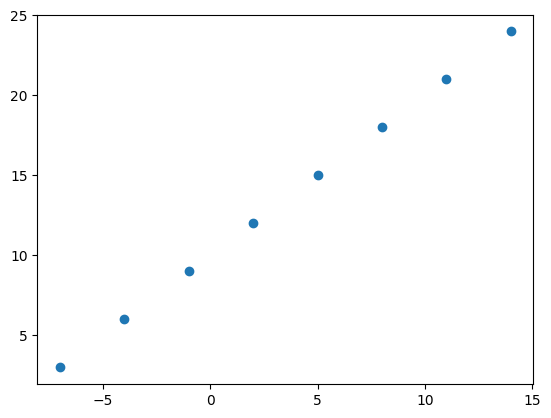

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,Y)

## Input and output shapes

In [4]:
# Creare a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
X = tf.reshape(X, (X.shape[0], 1))
Y = tf.reshape(Y, (Y.shape[0], 1))
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [8]:
X = tf.cast(X, dtype=tf.float32)
Y = tf.cast(Y, dtype=tf.float32)

## Step in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layer of a deep learning model
2. **Compliting a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns berween x & y (features and labels)

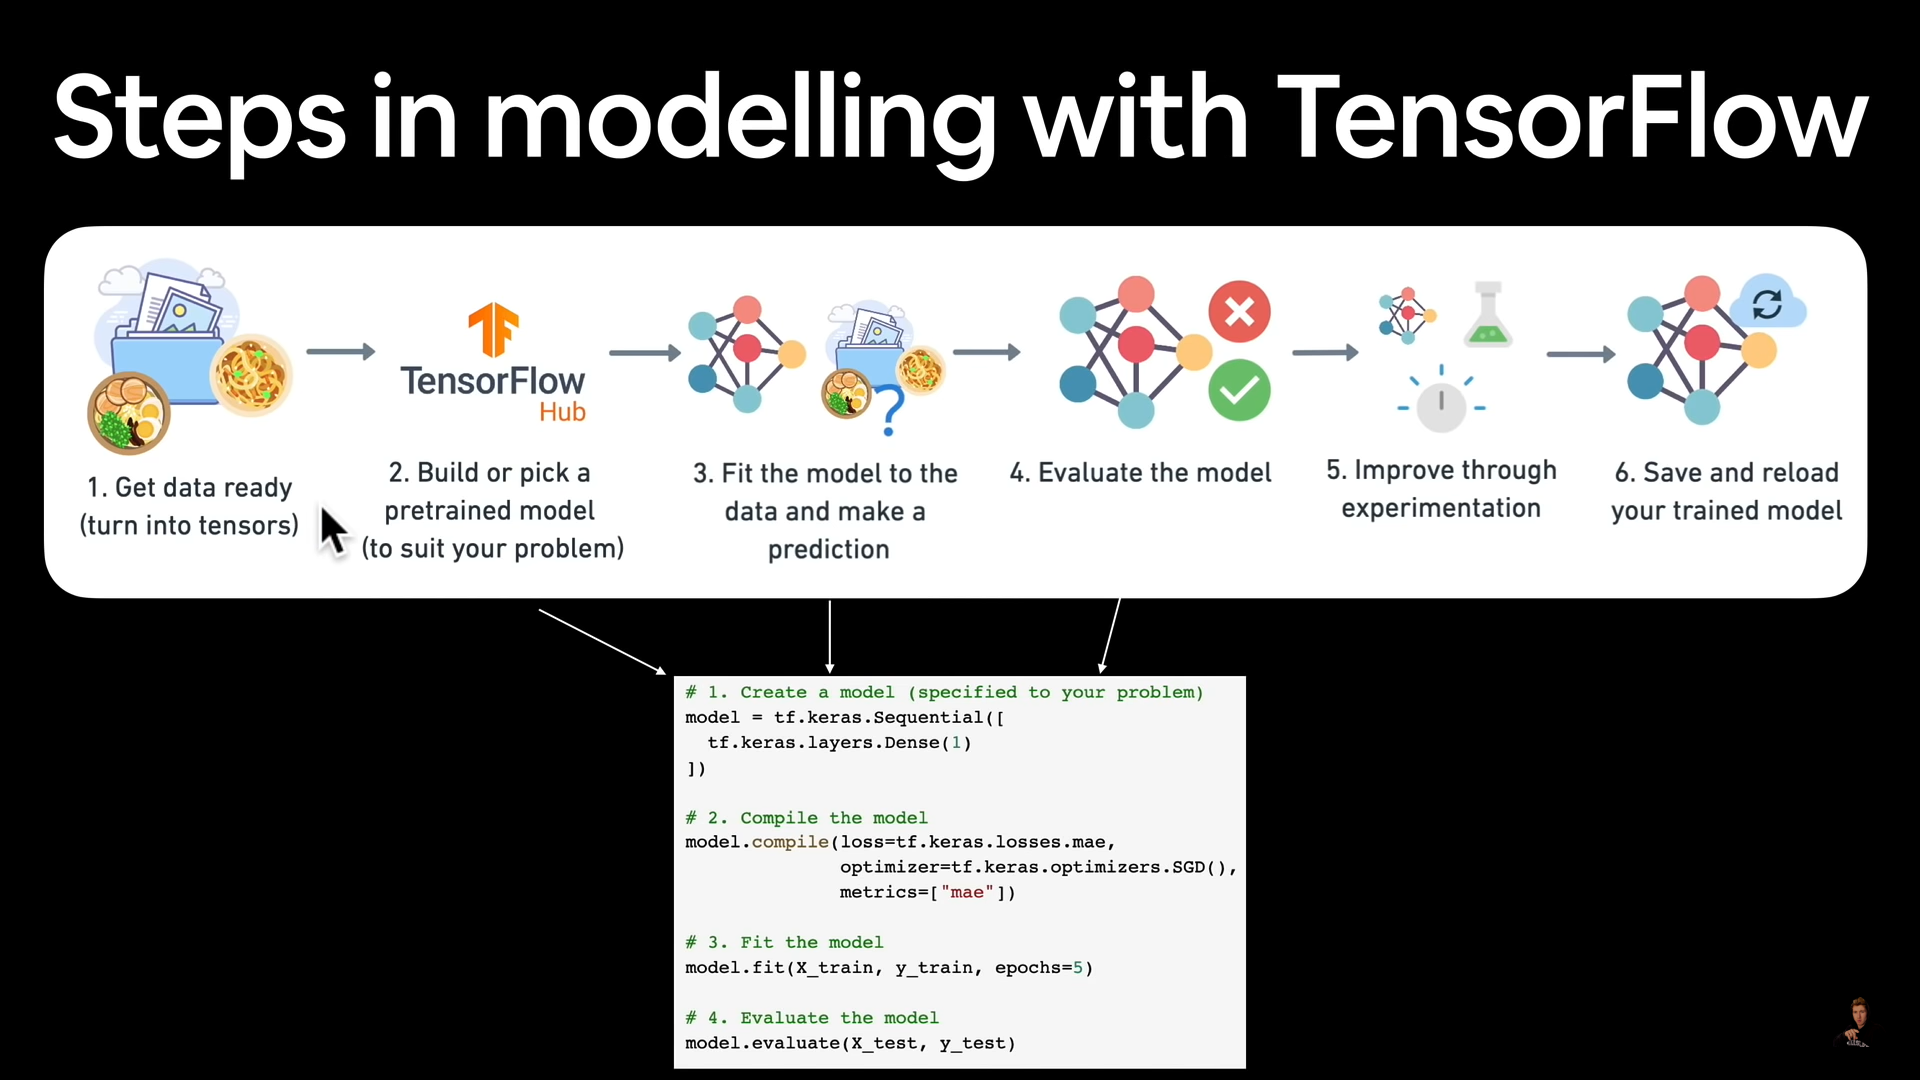

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Original and improving version:

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    #Improving
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    # -----------------
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              #optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), # Improving
              metrics=["mae"])
              # SGD optimizer better than Adam

#3. Fit the model
model.fit(X, Y, epochs= 100) # Old version is 5


In [ ]:
# Check out x and y
X,Y

In [43]:
# Try and make prediction  using our model
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[30.017454]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - ever we might add more layers. increase the numder of hidden units (all called neurons) within each of the hidden layers, change the actvation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more example to learn from).

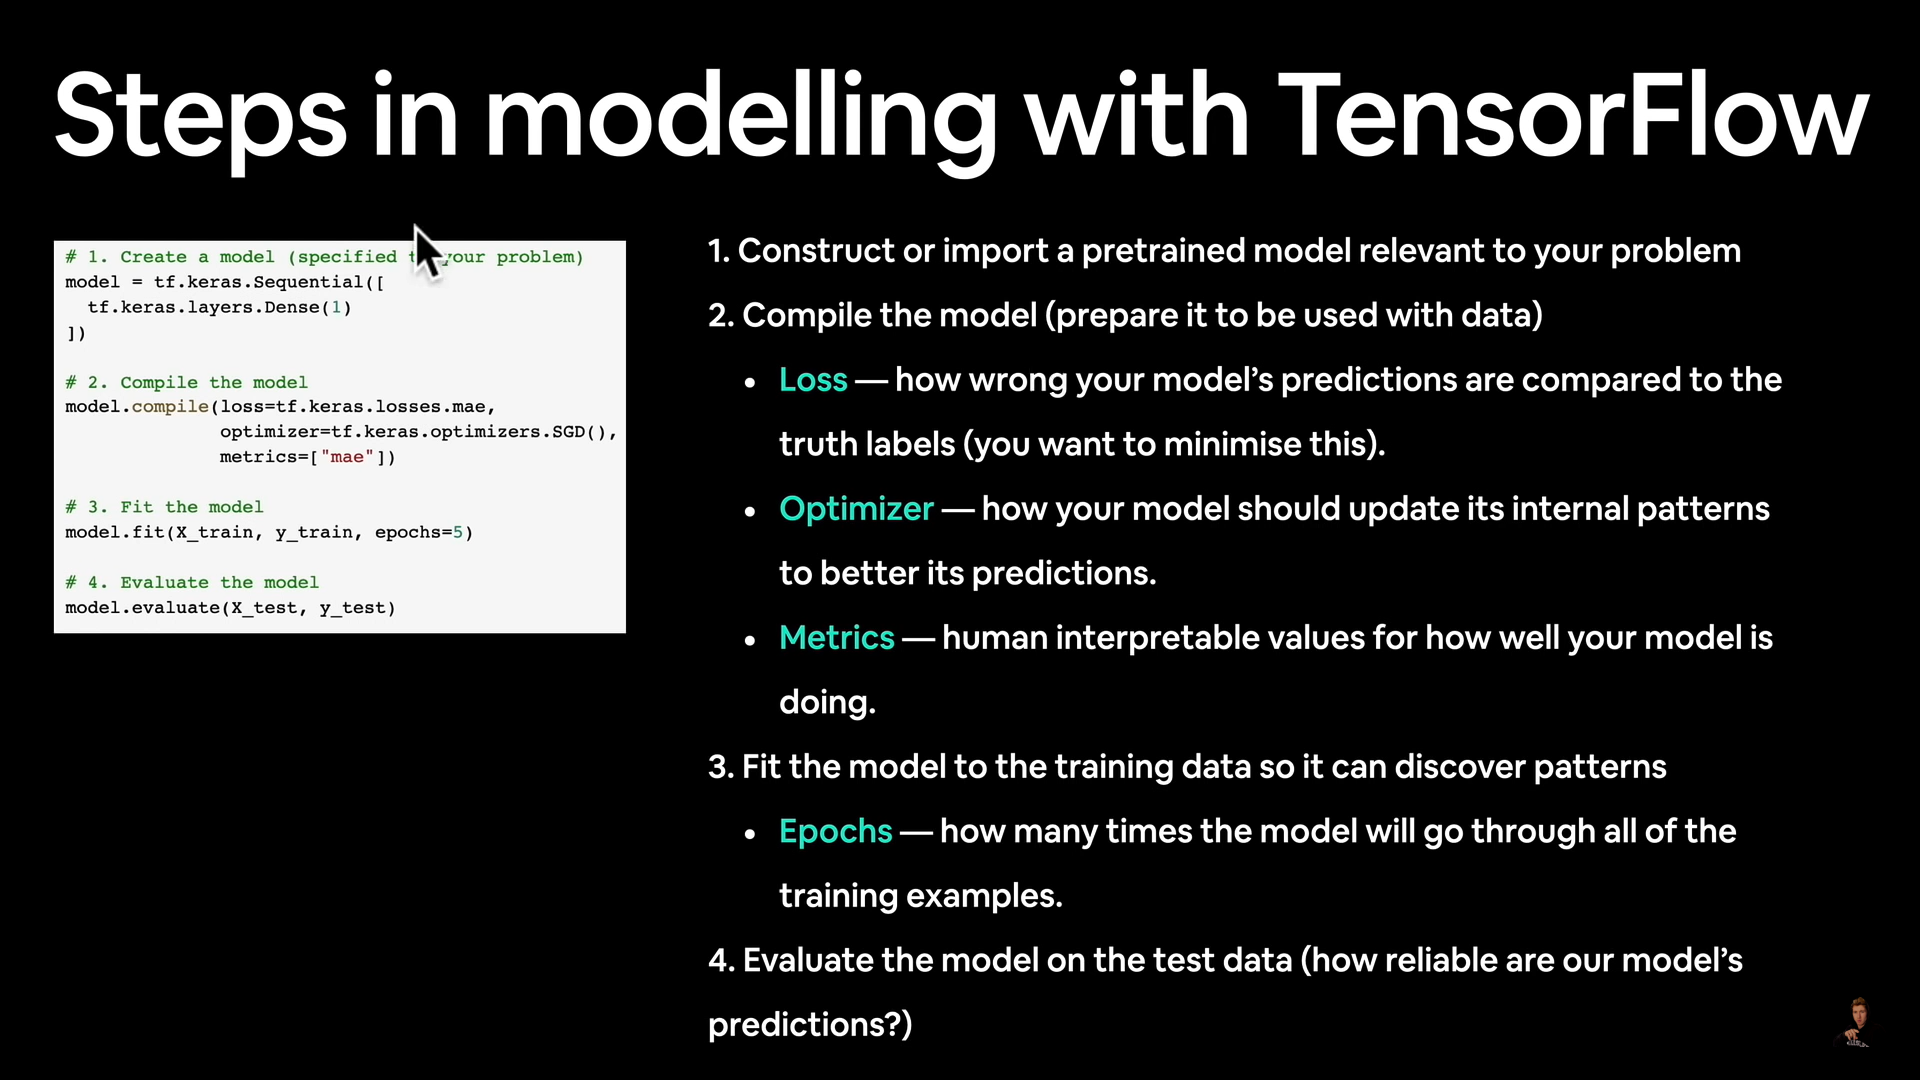

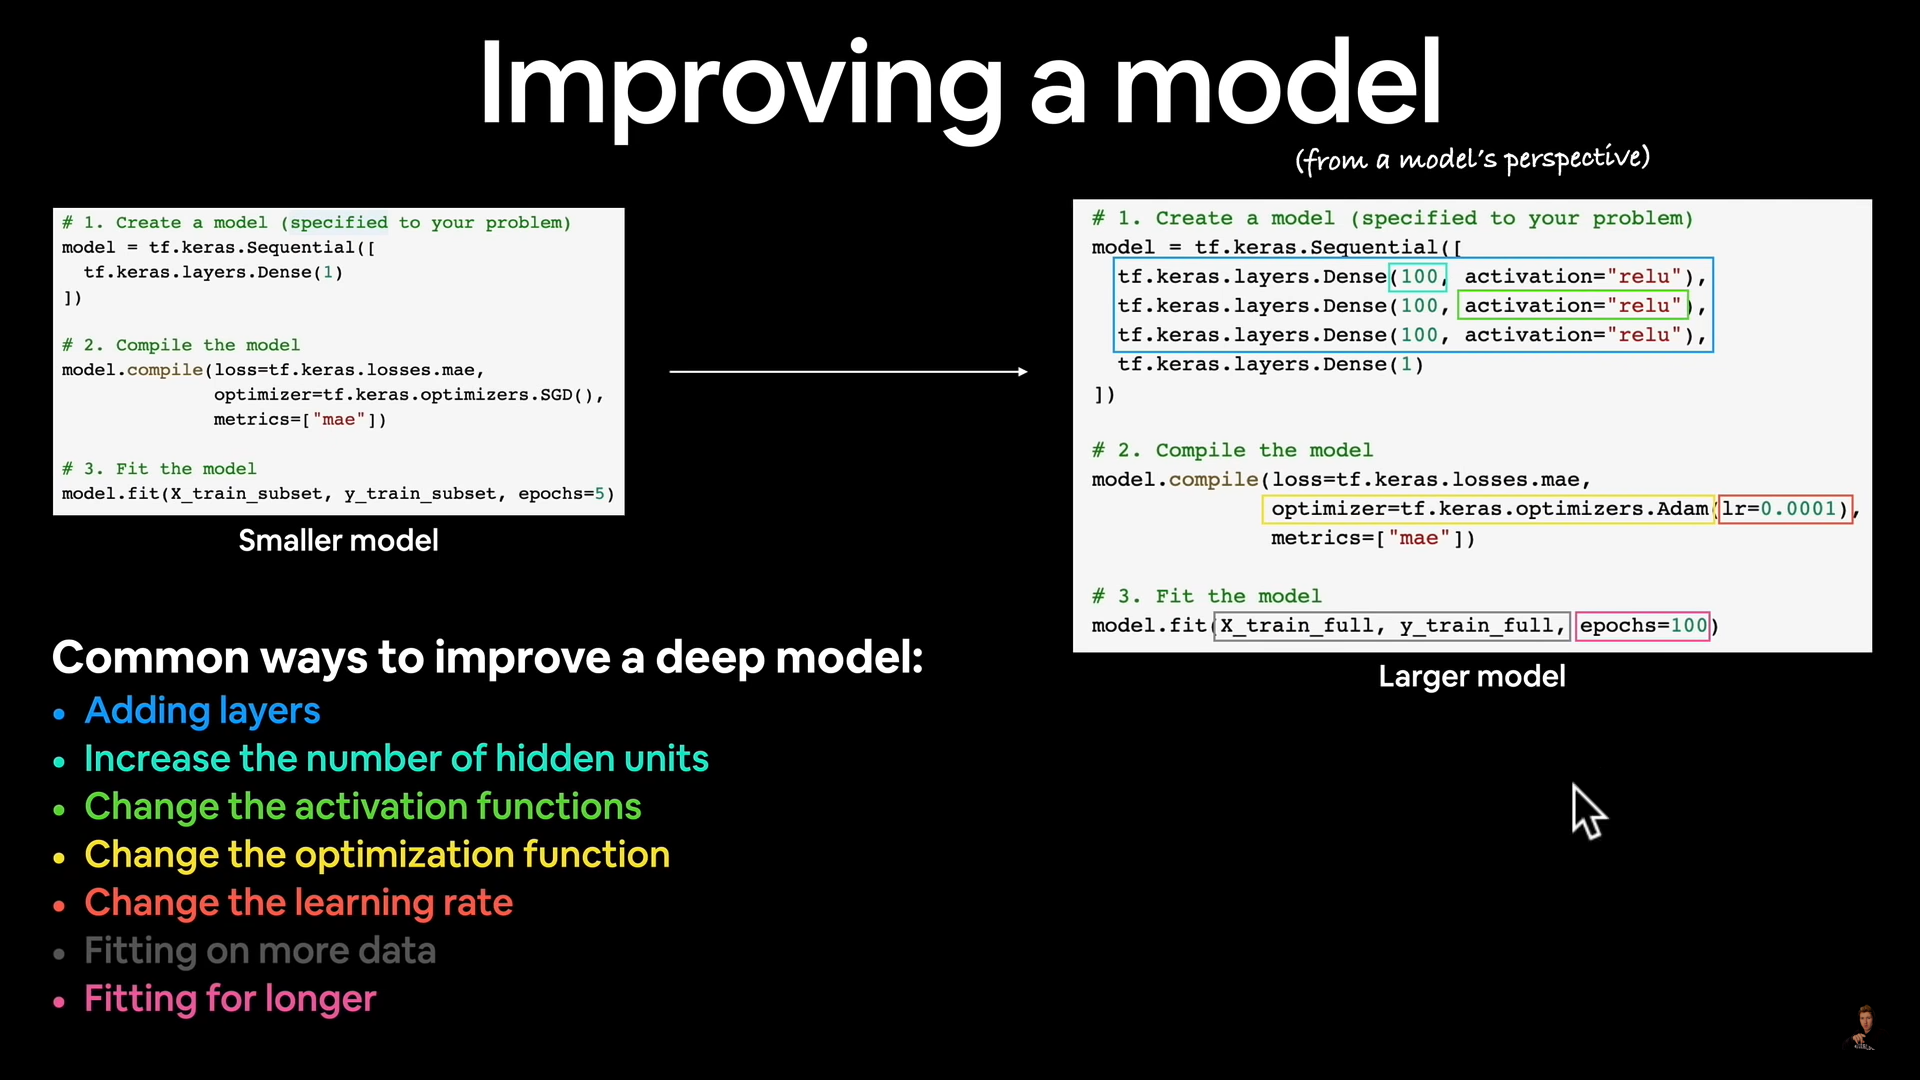

## Evaluting a model

In pratice, a typical workflow you'll go through when building neurall networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> ...
```

When it comes to evaluation--- there are 3 words you should memories:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how to prediction of a model line up against the around truth (original labels)

In [59]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [60]:
# Make the labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
X = tf.reshape(X, (X.shape[0], 1))
y = tf.reshape(y, (y.shape[0], 1))
X,y

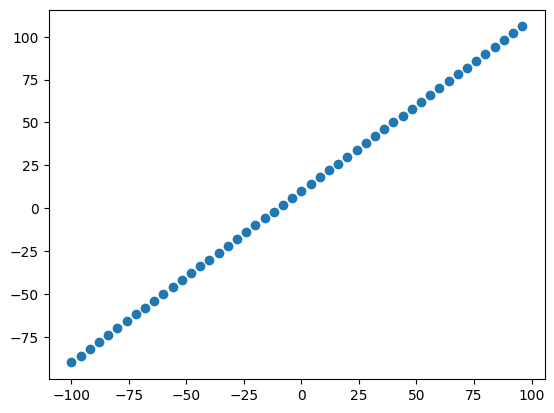

In [64]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets... 

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

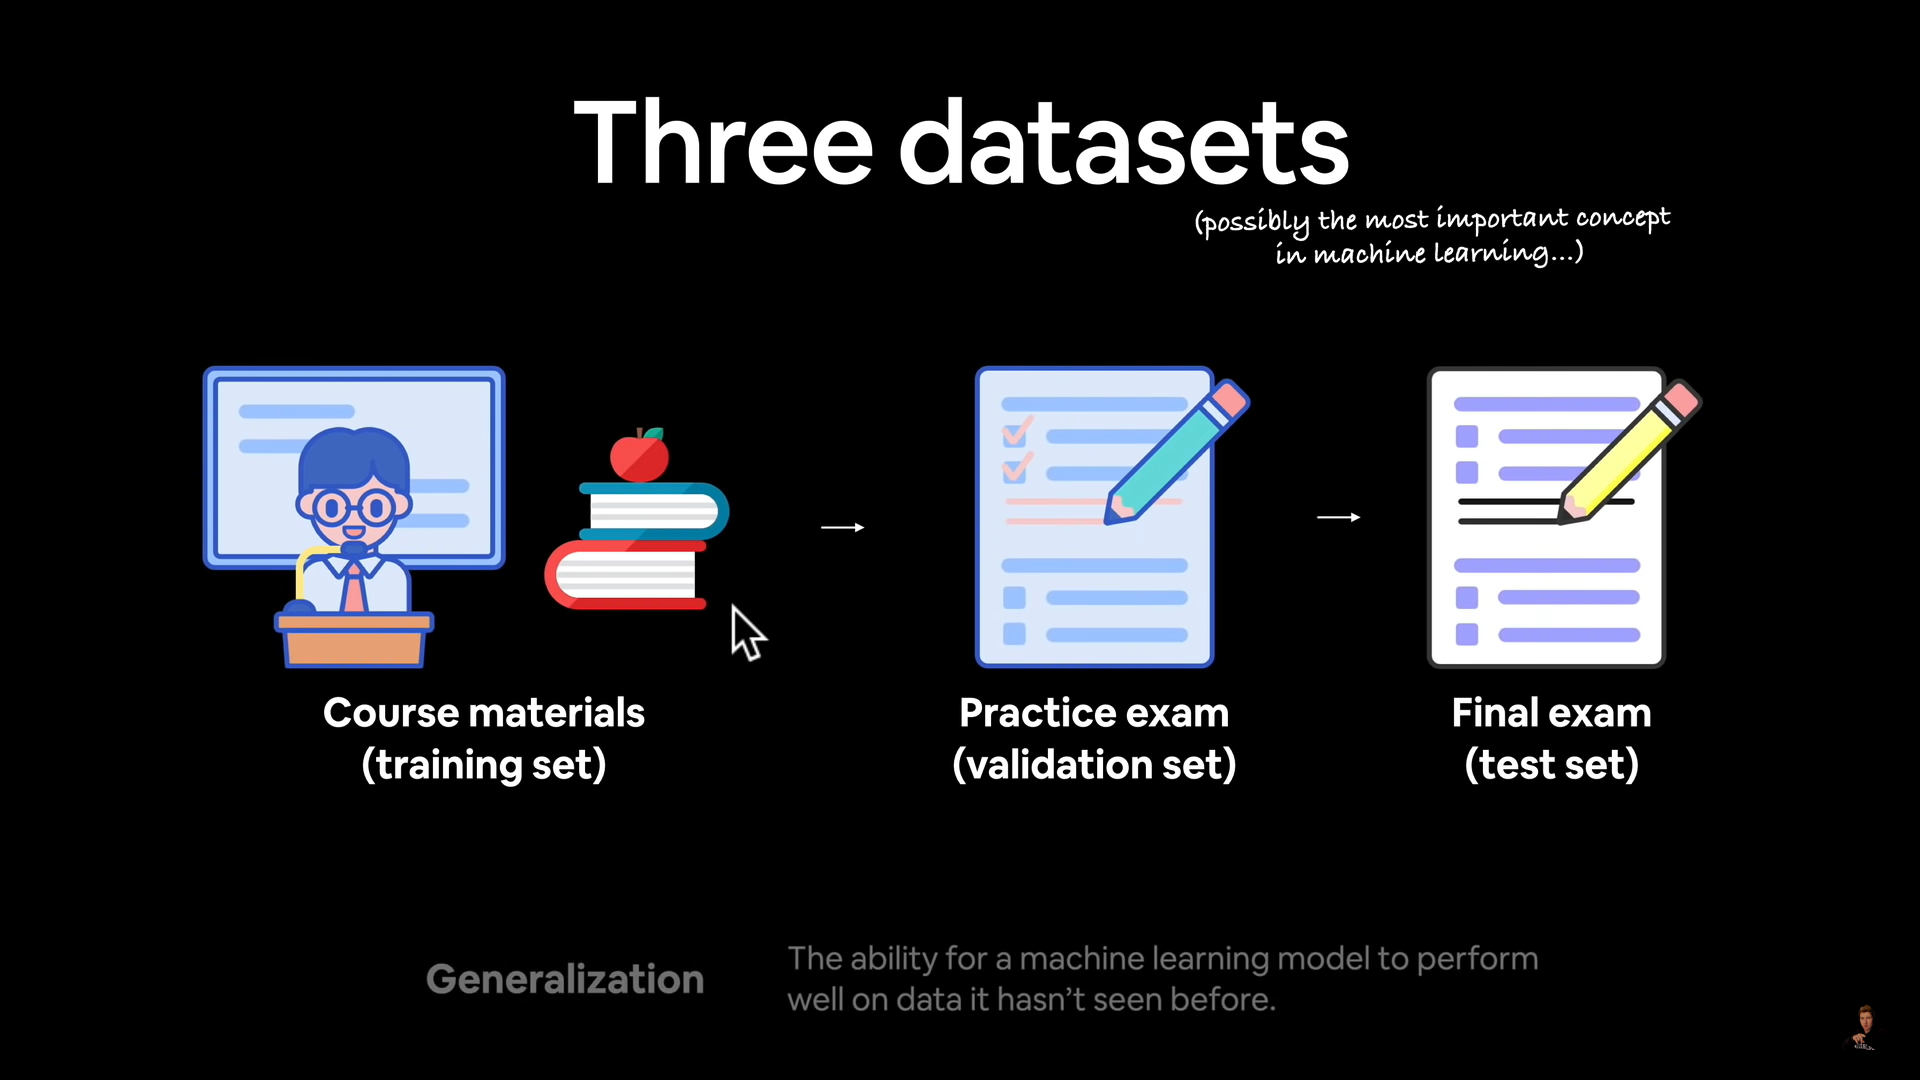

In [66]:
# Check the length of how many samples we have
len(X), len(y)

(50, 50)

In [ ]:
 # Split the data into train and test sets
 X_train = X[:40]
 y_train = y[:40]

 X_test = X[40:]
 y_test = y[40:]

 X_train, y_train, X_test, y_test

## Visualize the data

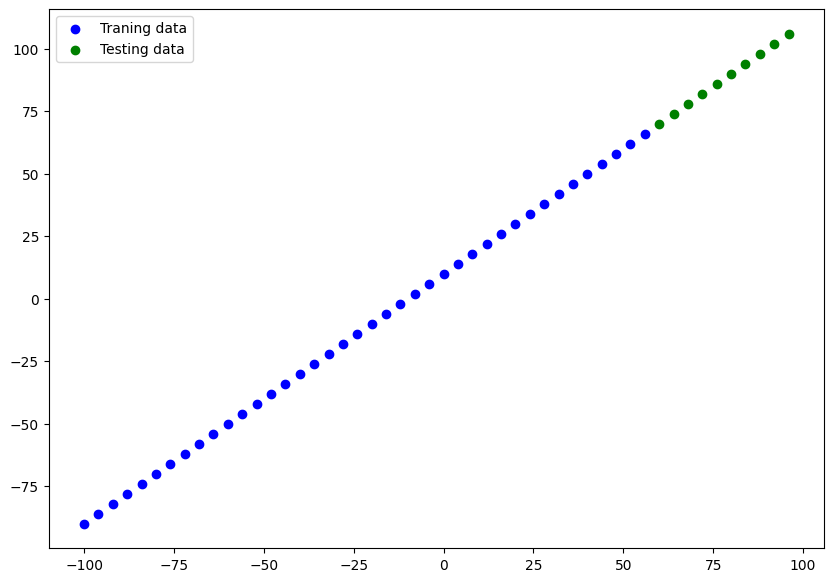

In [76]:
# This is the test set
plt.figure(figsize=(10, 7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Traning data")
# Plot traning data in blue
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [117]:
# Let's have a look at how to build a neural network for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

#model.fit(X_train, y_train, epochs=100)

In [118]:
## Visualizing the model
model.build(X_train.shape)
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (40, 100)                 200       
                                                                 
 dense_127 (Dense)           (40, 100)                 10100     
                                                                 
 dense_128 (Dense)           (40, 100)                 10100     
                                                                 
 dense_129 (Dense)           (40, 100)                 10100     
                                                                 
 dense_130 (Dense)           (40, 100)                 10100     
                                                                 
 dense_131 (Dense)           (40, 1)                   101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-tra

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during traning (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [ ]:
X.shape, (X.shape[0],1), X[0].shape, X
# X.shape[index] will show the number of elements in element[index]
# X[index].shape show the shape of the indexth elements in tensor X

```5:46:00```